   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


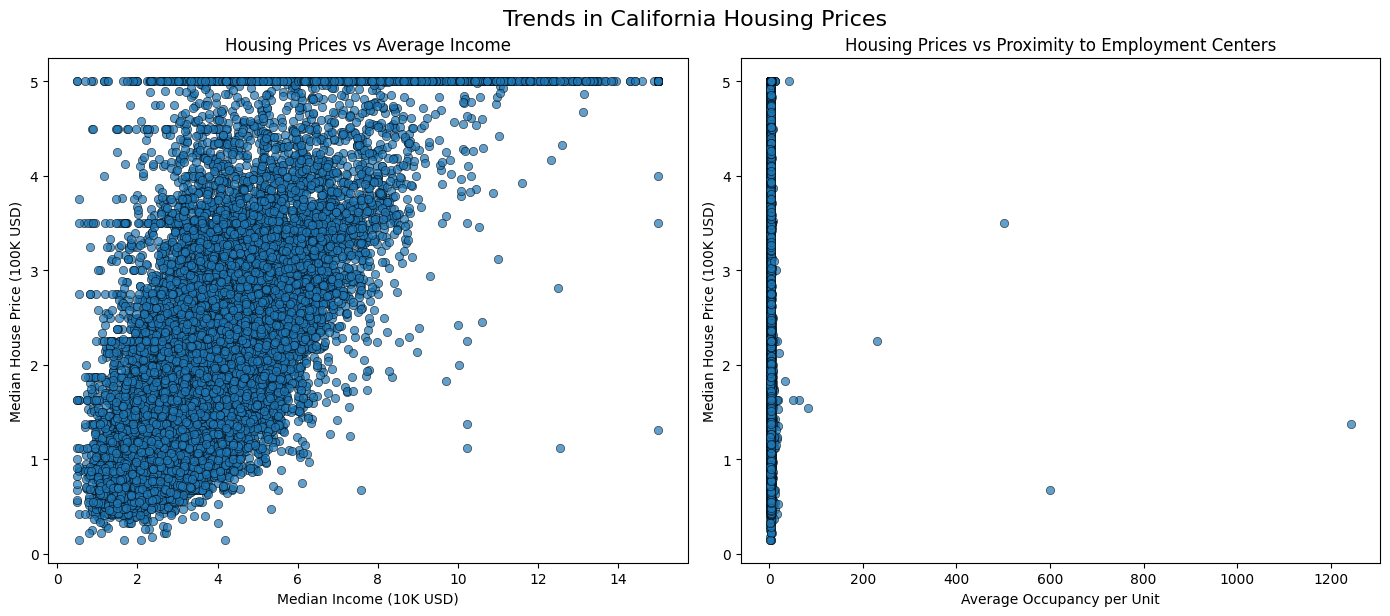

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display the first few rows of the dataset
print(df.head())

# Plot 1: Housing prices vs Average Income
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'], alpha=0.7, edgecolor='k')
plt.title('Housing Prices vs Average Income')
plt.xlabel('Median Income (10K USD)')
plt.ylabel('Median House Price (100K USD)')

# Plot 2: Housing prices vs Proximity to employment centers (AveOccup)
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['AveOccup'], y=df['MedHouseVal'], alpha=0.7, edgecolor='k')
plt.title('Housing Prices vs Proximity to Employment Centers')
plt.xlabel('Average Occupancy per Unit')
plt.ylabel('Median House Price (100K USD)')

# Display the plots
plt.tight_layout()
plt.suptitle('Trends in California Housing Prices', fontsize=16, y=1.02)
plt.show()


In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Split the data
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 0.2553684927247781
R-squared: 0.8051230593157366


Dataset Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Mean Squared Error: 0.26
R-squared: 0.81


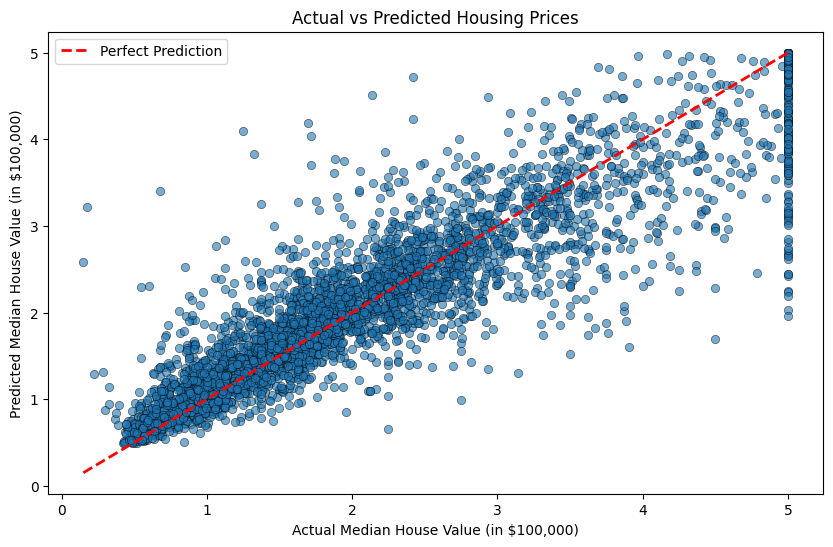

C:\Users\medar\AppData\Local\Temp\ipykernel_24732\2060685648.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


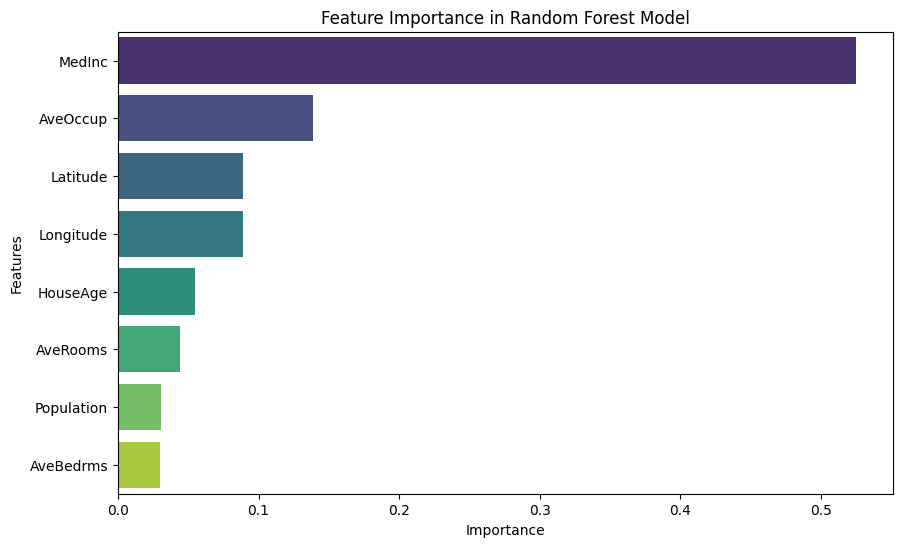

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Split the dataset into features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)  # Features
y = df['MedHouseVal']  # Target: Median house value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor='k')
plt.title('Actual vs Predicted Housing Prices')
plt.xlabel('Actual Median House Value (in $100,000)')
plt.ylabel('Predicted Median House Value (in $100,000)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Perfect Prediction')
plt.legend()
plt.show()

# Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
